<a href="https://colab.research.google.com/github/Jesus2342/Advanced_ML_Methods-/blob/main/A3a_DL_TC5033_embeddings_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 52

## Anghelo Daniel Pérez Martínez (A01795323)
## Luis Daniel Ortega Muñoz (A01795197)
## Emil Khaleb Palomino Bruzzón (A00826811)
## José de Jesús Peña Rodríguez (A01794940)
## Gerardo Miguel Pérez Solis (A01795599)

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from numpy.linalg import norm
import pickle
import numpy as np
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load file

In [3]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = '/content/drive/MyDrive/pytorch/Activity 3a/glove.6B.200d.txt'
emb_dim = 50

In [4]:
PATH

'/content/drive/MyDrive/pytorch/Activity 3a/glove.6B.200d.txt'

In [5]:
def create_emb_dictionary(path):
    """
    Creates a dictionary mapping words to their corresponding vectors from a file.

    Parameters:
        path (str): The path to the file containing word embeddings.

    Returns:
        dict: A dictionary with words as keys and their corresponding vectors as values.
    """

    # Initialize an empty dictionary to store word vectors
    dict_word_vect = {}

    # Open the specified file in read mode
    with open(path, "r") as raw_file:

        # Iterate through each line in the file
        for current_row in raw_file:
            # Split the line into words and their vector components
            row_splitted = current_row.split()

            # The first element is the word
            word = row_splitted[0]

            # The remaining elements are the vector components converted to float
            vector = list(map(float, row_splitted[1:]))

            # Store the word and its vector in the dictionary
            dict_word_vect[word] = vector

    return dict_word_vect


In [6]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)
# create list_keys
list_keys = list(embeddings_dict.keys())

In [7]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

#### See some embeddings

In [8]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [9]:
show_n_first_words(PATH, 5)

['the', '-0.071549', '0.093459', '0.023738', '-0.090339', '0.056123', '0.32547', '-0.39796', '-0.092139', '0.061181', '-0.1895', '0.13061', '0.14349', '0.011479', '0.38158', '0.5403', '-0.14088', '0.24315', '0.23036', '-0.55339', '0.048154', '0.45662', '3.2338', '0.020199', '0.049019', '-0.014132', '0.076017', '-0.11527', '0.2006', '-0.077657', '0.24328', '0.16368', '-0.34118', '-0.06607', '0.10152', '0.038232', '-0.17668', '-0.88153', '-0.33895', '-0.035481', '-0.55095', '-0.016899', '-0.43982', '0.039004', '0.40447', '-0.2588', '0.64594', '0.26641', '0.28009', '-0.024625', '0.63302', '-0.317', '0.10271', '0.30886', '0.097792', '-0.38227', '0.086552', '0.047075', '0.23511', '-0.32127', '-0.28538', '0.1667', '-0.0049707', '-0.62714', '-0.24904', '0.29713', '0.14379', '-0.12325', '-0.058178', '-0.001029', '-0.082126', '0.36935', '-0.00058442', '0.34286', '0.28426', '-0.068599', '0.65747', '-0.029087', '0.16184', '0.073672', '-0.30343', '0.095733', '-0.5286', '-0.22898', '0.064079', '0.0

### Plot some embeddings

In [10]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA):
    """
    Plots 2D embeddings of specified words from the embeddings dictionary.

    Parameters:
        emb_path : Path to the embeddings file (not used in this function).
        words2show : List of words to display in the plot.
        emb_dim : Dimensionality of the embeddings (not used directly in this function).
        embeddings_dict : Dictionary containing words as keys and their corresponding vectors as values.
        func: Dimensionality reduction function to apply (default is PCA).
    """

    # Filter out words that are not in the embeddings dictionary
    filtered_words = [word for word in words2show if word in embeddings_dict]
    missing_words = [word for word in words2show if word not in embeddings_dict]

    # Print missing words, if any
    if missing_words:
        print(f"These words were not found in the dictionary: {', '.join(missing_words)}")

    # Retrieve vectors for the filtered words from the embeddings dictionary
    vectors = [embeddings_dict[word] for word in filtered_words]
    vectors = np.array(vectors)  # Convert the list of vectors to a NumPy array

    # Initialize the dimensionality reduction function
    reduction_function = func(n_components=2)
    # Apply the dimensionality reduction to project vectors to 2D
    vectors_2d = reduction_function.fit_transform(vectors)

    # Create a figure for the plot
    plt.figure(figsize=(20, 20))
    # Scatter plot of the 2D vectors, coloring the points red
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], color="red")

    # Determine the title based on the reduction function used
    if func == PCA:
        title = "<PCA>"
    else:
        title = "<TSNE>"

    # Label each point with the corresponding word
    for i, word in enumerate(filtered_words):
        plt.text(vectors_2d[i, 0], vectors_2d[i, 1], word, fontsize=12, ha='right')

    # Set the title and axis labels
    plt.title("2D Visualization of Word Vectors" + " " + title)
    plt.xlabel("PCA Dimension 1")  # or TSNE Dimension 1
    plt.ylabel("PCA Dimension 2")  # or TSNE Dimension 2
    plt.grid()  # Add a grid to the plot
    plt.show()  # Display the plot



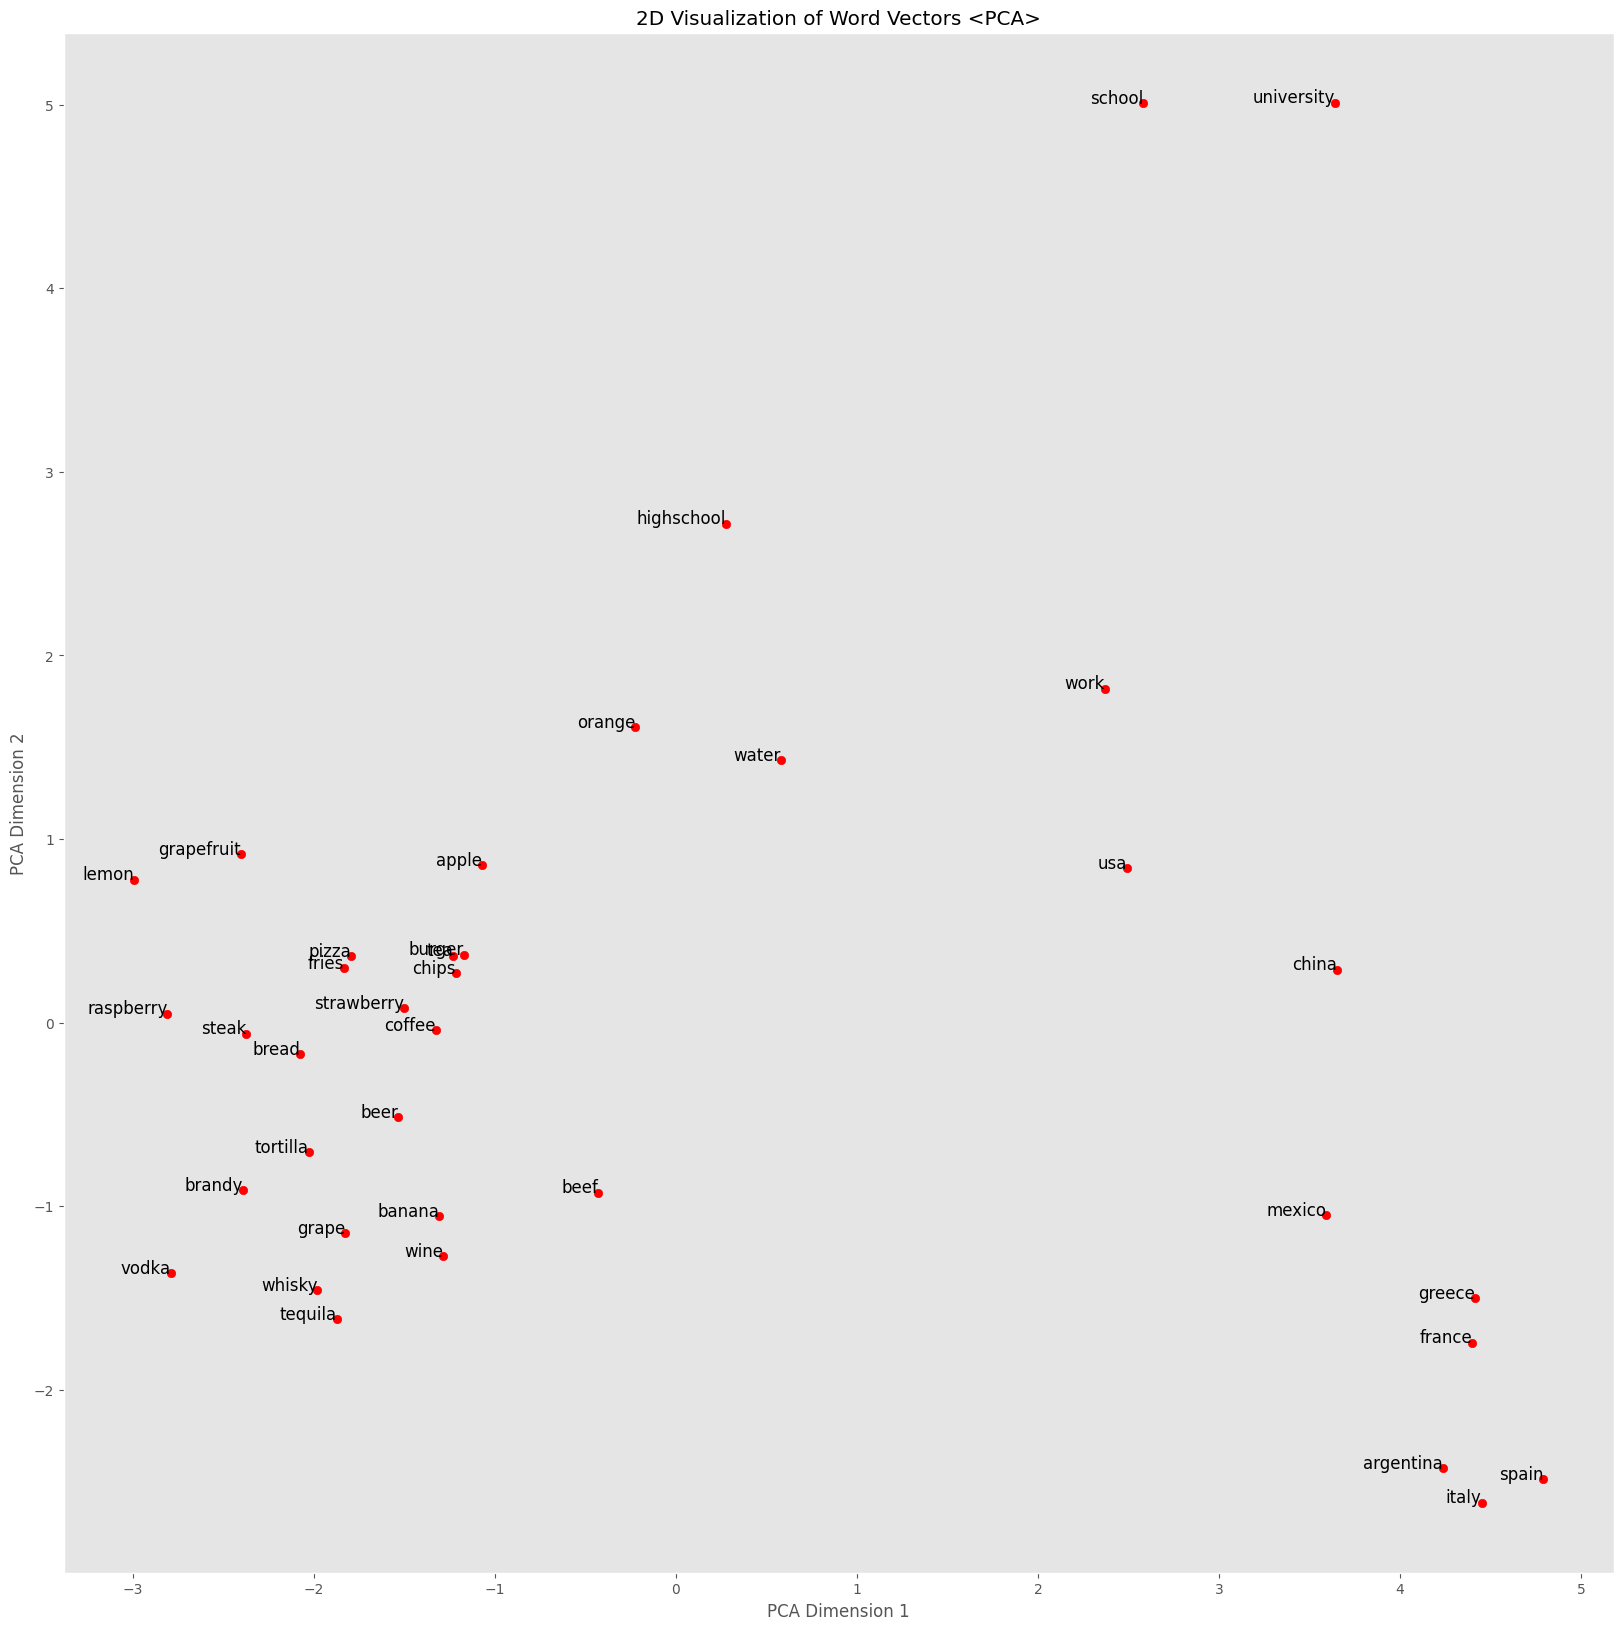

In [12]:
# PCA dimensionality reduction for visualization
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

-----

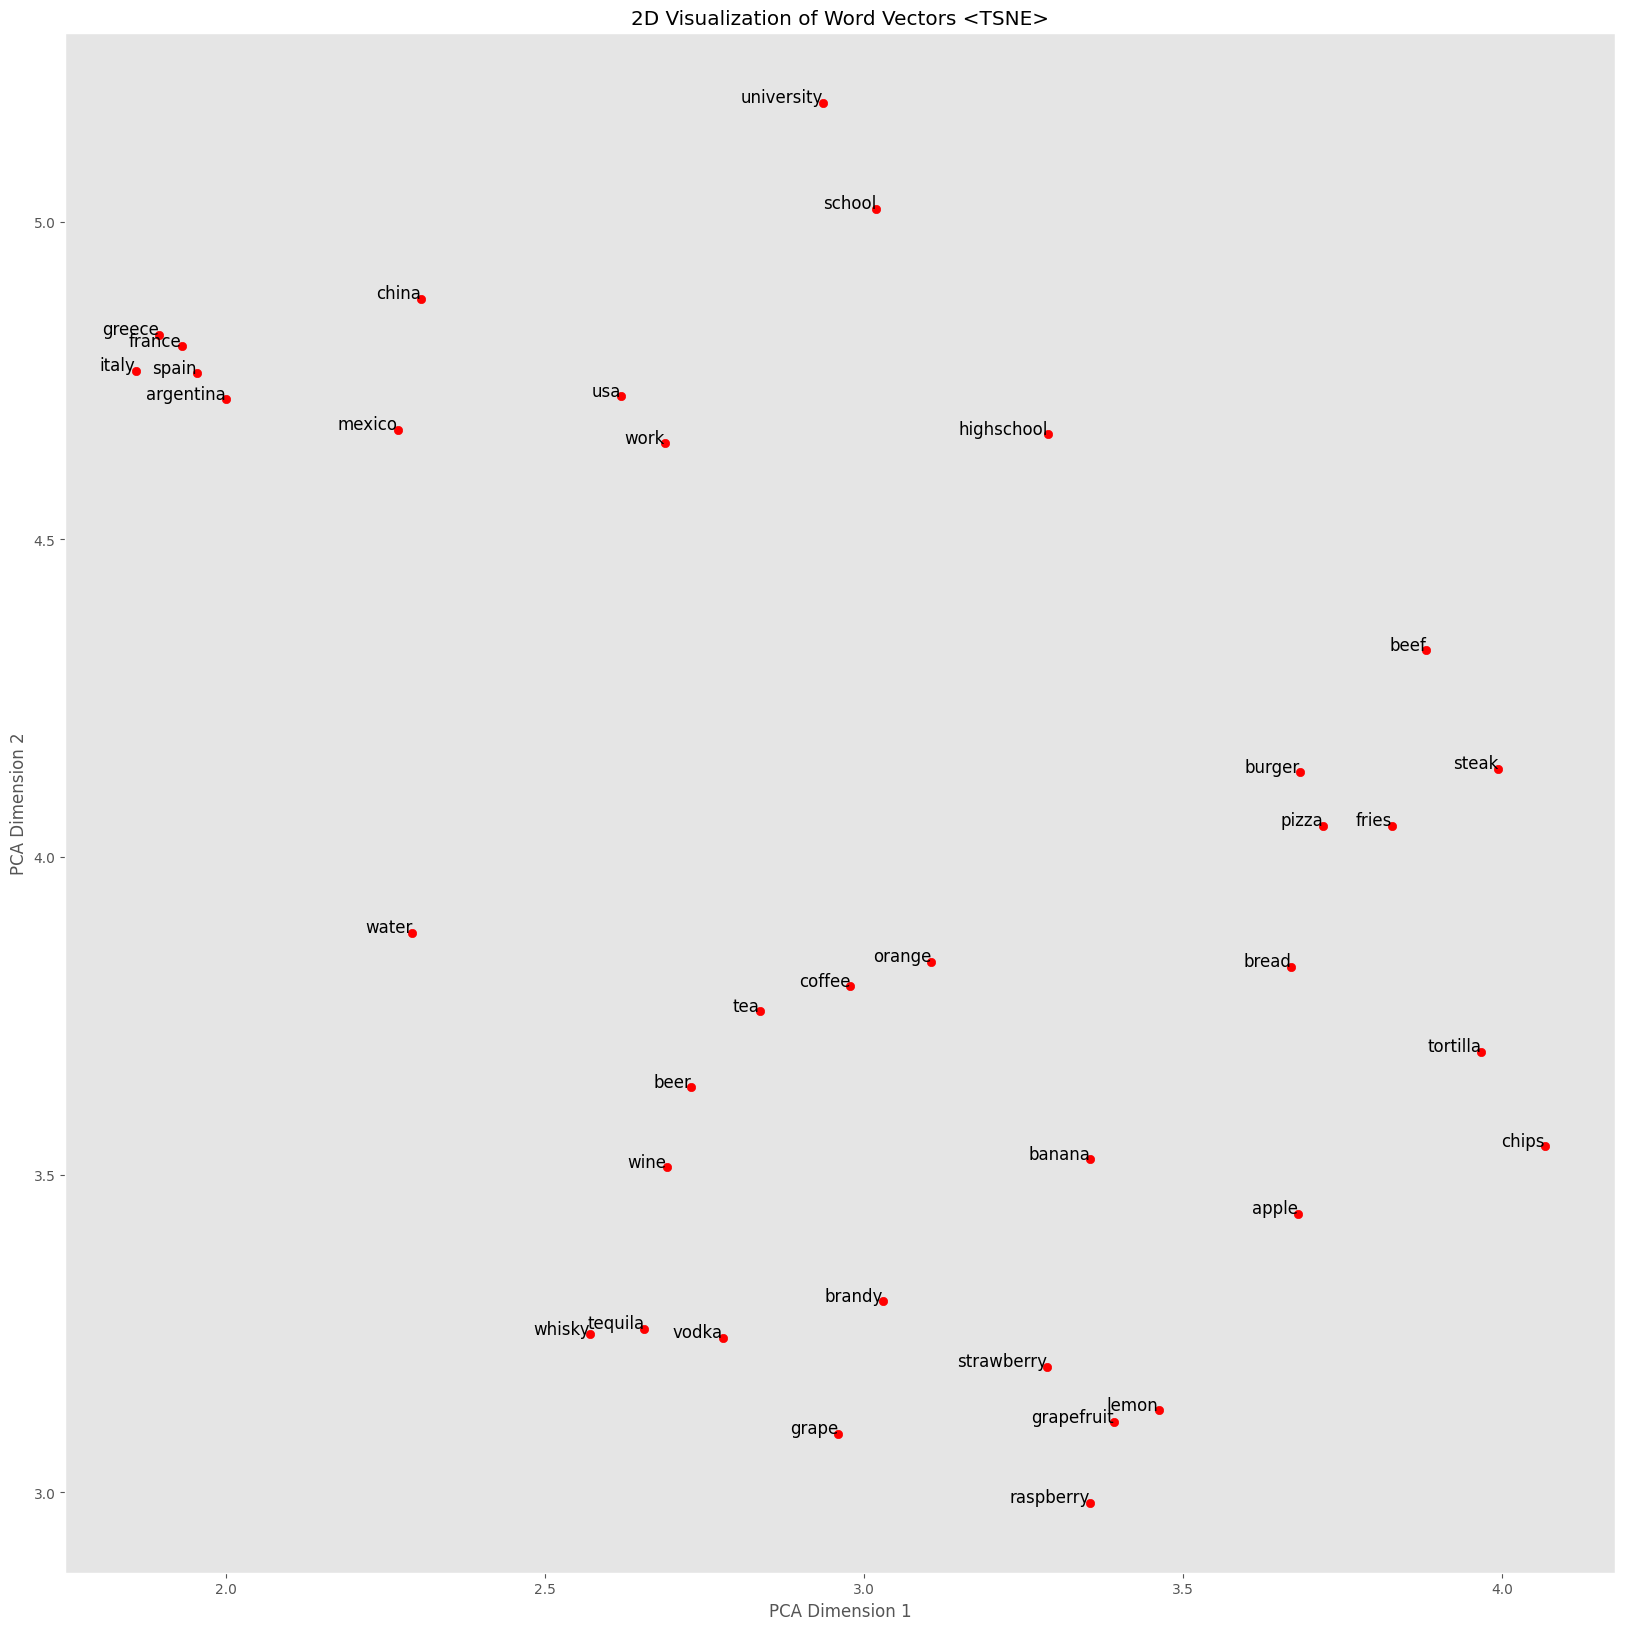

In [13]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

In [14]:
from gensim.models import KeyedVectors
import numpy as np

def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Finds the top N most similar words to a given word based on the embeddings dictionary.

    Parameters:
        word : The target word for which to find similar words.
        embeddings_dict (dict): Dictionary containing words as keys and their corresponding vectors as values.
        top_n : The number of most similar words to return (default is 10).
    """

    # Determine the embedding size from the first vector in the dictionary
    embedding_size = len(list(embeddings_dict.values())[0])

    # Create an empty KeyedVectors model with the specified embedding size
    model = KeyedVectors(vector_size=embedding_size)

    # Separate words and vectors from the embeddings dictionary for batch loading
    words = list(embeddings_dict.keys())
    vectors = np.array(list(embeddings_dict.values()))

    # Add all vectors to the model in a batch operation
    model.add_vectors(words, vectors)

    # Check if the target word is in the model
    if word in model:
        # Find the top N most similar words to the target word
        similar_words = model.most_similar(positive=[word], topn=top_n)

        # Display the results
        print(f"Top {top_n} words most similar to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"{similar_word}: {similarity:.4f}")
    else:
        # If the word is not found, print a message
        print(f"The word '{word}' was not found in the dictionary.")


In [15]:
most_similar = find_most_similar('mexico', embeddings_dict)

Top 10 words most similar to 'mexico':
mexican: 0.7466
venezuela: 0.6773
colombia: 0.6658
peru: 0.6652
guatemala: 0.6428
argentina: 0.6351
brazil: 0.6252
chile: 0.6207
bolivia: 0.6197
america: 0.6158


In [16]:
def analogy(word1, word2, word3, embeddings_dict, top_n=1):
    """
    Finds the analogy of the form 'word1 is to word2 as word3 is to ?'
    using the embeddings dictionary.

    Parameters:
        word1 : The first word in the analogy.
        word2 : The second word in the analogy.
        word3 : The word to find the analogy for the comparison.
        embeddings_dict: Dictionary containing words as keys and their corresponding vectors as values.
        top_n : The number of most similar words to return (default is 1).
    """

    # Determine the embedding size from the first vector in the dictionary
    embedding_size = len(list(embeddings_dict.values())[0])

    # Create an empty KeyedVectors model with the specified embedding size
    model = KeyedVectors(vector_size=embedding_size)

    # Separate words and vectors from the embeddings dictionary for batch loading
    words = list(embeddings_dict.keys())
    vectors = np.array(list(embeddings_dict.values()))

    # Add all vectors to the model in a batch operation
    model.add_vectors(words, vectors)

    # Check if all three words are in the model
    for word in [word1, word2, word3]:
        if word not in model:
            print(f"The word '{word}' was not found in the dictionary.")
            return None  # Exit the function if any word is missing

    # Perform the analogy calculation: word2 - word1 + word3
    result = model.most_similar(positive=[word2, word3], negative=[word1], topn=top_n)

    # Display the results of the analogy
    print(f"Analogy: '{word1}' is to '{word2}' as '{word3}' is to:")

    for similar_word, similarity in result:
        print(f"{similar_word}: {similarity:.4f}")  # Print each similar word with its similarity score

In [17]:
analogy('man', 'king', 'woman', embeddings_dict)

Analogy: 'man' is to 'king' as 'woman' is to:
queen: 0.6979
